In [157]:
#If opening in colab run this cell
!git clone https://github.com/RubingLi123/foster_2023spring.git
%cd foster_2023spring/Homeworks

Cloning into 'foster_2023spring'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 350 (delta 96), reused 170 (delta 52), pack-reused 102
Receiving objects: 100% (350/350), 53.66 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (61/61), done.
/content/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks


## DELETE THIS CELL AFTER SAVING HW TO GOOGLE DRIVE

# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [158]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 

### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [160]:
# Put your answer here
df = pd.read_csv(data_path)

Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [161]:
# Put your answer here
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [135]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [162]:
# Put your answer here
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [163]:
# Put your answer here
import datetime as dt
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [164]:
# Put your answer here
df['TimeInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [139]:
df.shape

(110527, 15)

In [165]:
# Put your answer here
df.describe()
df = df[df['Age'] >= 0]
df = df[df['TimeInAdvance'] >= 0]
df.describe()
df.shape

(110521, 15)

Number of entries removed = 6

Removed the observations where the Age was less than 0 and TimeInAdvance less than 0.

### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [166]:
# Put your answer here
df['IsFemale'] = (df['Gender'] == 'F').astype('int')
df = df.drop(['Gender'], axis = 1)
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [167]:
# Put your answer here
df['No-show'] = (df['No-show'] == 'No').astype('int')
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41,1


### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [168]:
# Put your answer here
df['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighborhood, Length: 81, dtype: int64

Most Common:

JARDIM CAMBURI                    
MARIA ORTIZ                    
RESISTÊNCIA                    
JARDIM DA PENHA                
ITARARÉ                        

Least Common:

ILHA DO BOI                      
ILHA DO FRADE                    
AEROPORTO                        
ILHAS OCEÂNICAS DE TRINDADE      
PARQUE INDUSTRIAL                 

** 10. (Optional) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [33]:
# Put your (optional) answer here

** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [169]:
# Put your answer here
dummies = pd.get_dummies(df['Neighborhood'])
df = pd.concat([df, dummies], axis=1)
df = df.drop('Neighborhood', axis=1)

In [145]:
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientId column. How many patients have made more than one appointment?  **

In [170]:
# Put your answer here

appointments = df['PatientId'].value_counts()
multiple_appointments = (appointments > 1).sum()

print(multiple_appointments)
df


24494


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [ ]:
# Put your (optional) answer here

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [171]:
# Put your answer here
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [37]:
df

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,AEROPORTO,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,62,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,35,1,0,...,0,0,0,0,0,0,0,0,0,0
110523,51,0,0,0,0,0,1,35,1,0,...,0,0,0,0,0,0,0,0,0,0
110524,21,0,0,0,0,0,1,41,1,0,...,0,0,0,0,0,0,0,0,0,0
110525,38,0,0,0,0,0,1,41,1,0,...,0,0,0,0,0,0,0,0,0,0


### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [180]:
# Put your answer here
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

y = df['No-show'].astype(int)
X = df.drop(['No-show'], axis = 1)
# feature matrix X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

train_accuracy = classifier.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

cv_accuracy = cross_val_score(classifier, X, y, cv=5)
cv_acc = cv_accuracy.mean()
print("Cross-validation accuracy:", cv_acc)


Training accuracy: 0.9642146217879117
Cross-validation accuracy: 0.718478837021641


** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

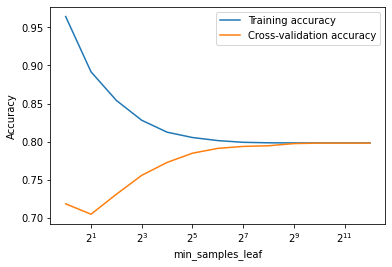

10


In [182]:
# Put your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y = df['No-show'].astype(int)
X = df.drop(['No-show'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_leaf_values = [2**i for i in range(0, 13)]

train_scores_list = []
cv_scores_list = []

# Loop over the values of min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    classifier = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    classifier.fit(X_train, y_train)

    train_accuracy = classifier.score(X_train, y_train)
    train_scores_list.append(train_accuracy)

    cv_accuracy = np.mean(cross_val_score(classifier, X, y, cv=5))
    cv_acc = cv_accuracy.mean()
    cv_scores_list.append(cv_acc)

plt.plot(min_samples_leaf_values, train_scores_list, label='Training accuracy')
plt.plot(min_samples_leaf_values, cv_scores_list, label='Cross-validation accuracy')
plt.xscale('log', base=2)
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Calculate
max_index = 0
list_len = len(cv_scores_list)
for index in range(list_len):
    if cv_scores_list[index] > cv_scores_list[max_index]:
        max_index = index

print(max_index)

The fitting curves show that as we increase min_samples_leaf, the training accuracy decreases while the cross-validation accuracy increases. This is expected because increasing min_samples_leaf makes the decision tree more simple and less prone to overfitting. However, when min_samples_leaf becomes too large, the decision tree becomes too simple and starts to underfit the data.
So the min_samples_leaf should be 2^10 = 1024, as it gives the max cross validation accuracy

** 17. (Optional) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

In [ ]:
# Put your (optional) answer here (use 'markdown' rather than 'code').